In [27]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt   
from sklearn import metrics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [2]:
df = pd.read_csv("petrol.csv",header=0)
df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [3]:
df.rename(columns={' income':'income'},inplace=True)
df.rename(columns={' consumption':'consumption'},inplace=True)
df.rename(columns={' highway':'highway'},inplace=True)
df.rename(columns={' dl':'dl'},inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
tax            48 non-null float64
income         48 non-null int64
highway        48 non-null int64
dl             48 non-null float64
consumption    48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [6]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [7]:
df['tax'] = remove_outlier(df,'tax')
df['income'] = remove_outlier(df,'income')
df['highway'] = remove_outlier(df,'highway')
df['dl'] = remove_outlier(df,'dl')
df['consumption'] = remove_outlier(df,'consumption')

In [8]:
df['income'] = df['income'].fillna(df['income'].mean())
df['consumption'] = df['consumption'].fillna(df['consumption'].mean())
df['highway'] = df['highway'].fillna(df['highway'].mean())
df['dl'] = df['dl'].fillna(df['dl'].mean())
df['tax'] = df['tax'].fillna(df['tax'].mean())

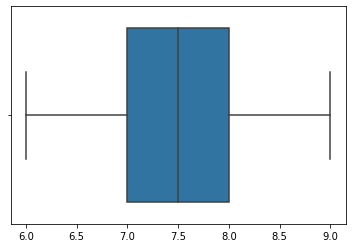

In [9]:
sns.boxplot(df)

# Question 3 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [10]:
df.corr()

,tax,income,highway,dl,consumption
tax,1.000000,1.000000,0.999473,0.992173,0.983923
income,1.000000,1.000000,0.999473,0.992173,0.983923
highway,0.999473,0.999473,1.000000,0.991543,0.983183
dl,0.992173,0.992173,0.991543,1.000000,0.991685
consumption,0.983923,0.983923,0.983183,0.991685,1.000000


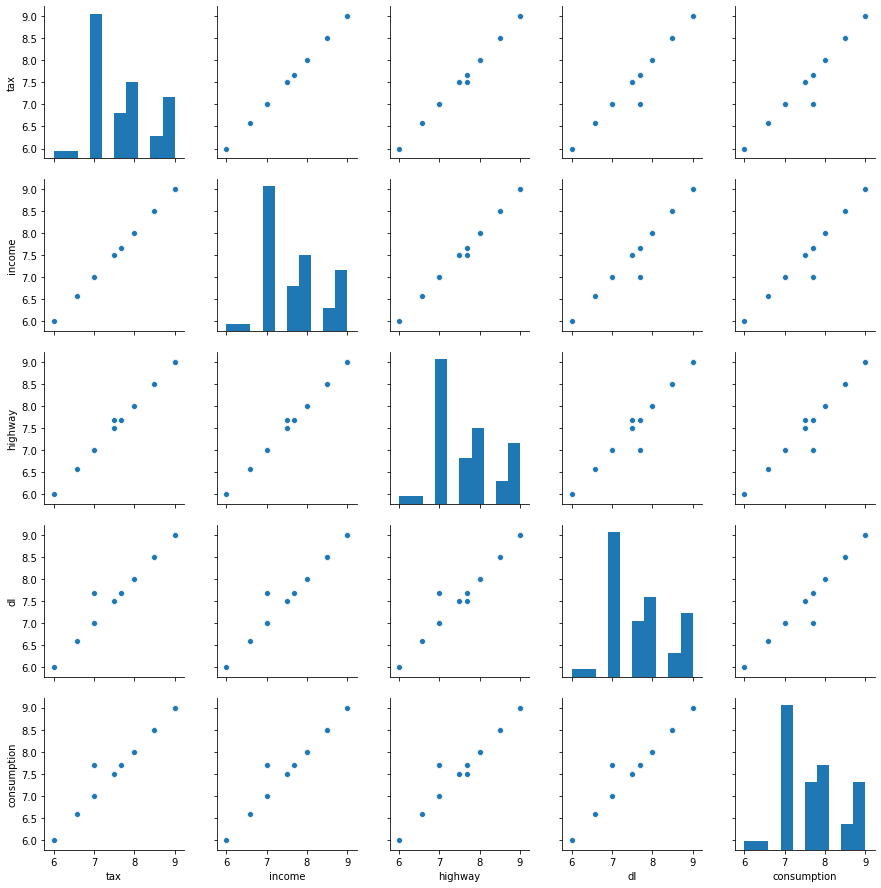

In [11]:
sns.pairplot(df)

# Question 4 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [17]:
train = df['income']
test = df['consumption']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(38,)
(38,)
(10,)
(10,)


# Question 5 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [28]:
feature_names = np.array(['tax','income','highway','dl'])
# define the data/predictors as the pre-set feature names  
df_1 = pd.DataFrame(df, columns=['income'])

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(df, columns=["consumption"])

In [29]:
x = df_1                      #independent
y = target['consumption']     #dependent
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [30]:
a = lm.coef_
df2 = pd.DataFrame({'lm.coef_':a},index=['consumption'])
df2

,lm.coef_
consumption,0.968105


# R-Square 

# Question 6 - Evaluate the model 
Calculate the accuracy score for the above model.

In [31]:
metrics.r2_score(x_train, y_train)

0.9754876529659074

# Question 7: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [33]:
x = df[['tax', 'income','highway']]
y = df['consumption']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(38, 3)
(38,)
(10, 3)
(10,)


# Question 8: Print the coefficients of the multilinear regression model

In [ ]:
feature_names = np.array(['tax','income','highway'])
# define the data/predictors as the pre-set feature names  
df_1 = pd.DataFrame(df, columns=feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(df, columns=["consumption"])

In [ ]:
x = df_1#independent
y = target['consumption']#dependent
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [36]:
a = lm.coef_
df2 = pd.DataFrame({'lm.coef_':a},index=feature_names)
df2

,lm.coef_
tax,0.968105
income,0.968105
highway,0.968105
dl,0.968105


# Question 9
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

In [37]:
lmbut1 = sm.OLS(y,x).fit()
lmbut1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            consumption   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.886e+04
Date:                Sat, 19 Oct 2019   Prob (F-statistic):                    1.10e-80
Time:                        23:18:48   Log-Likelihood:                          25.743
No. Observations:                  48   AIC:                                     -47.49
Df Residuals:                      46   BIC:                                     -43.74
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tax            0.5788      0.407      1.422      0.162      -0.240       1.398
income         0.5788      0.407      1.422      0.162      -0.240       1.398
highway       -0.1539      0.814     -0.189      0.851      -1.792       1.484
==============================================================================
Omnibus:                       79.074   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.589
Skew:                           4.564   Prob(JB):                    3.68e-192
Kurtosis:                      21.907   Cond. No.                     4.12e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.05e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.